# Partial Differential Equations

### What is the electrostatic potential $\phi$ in a 1 m x 1 m square region, where the sides are grounded and only the top is placed at a potential $V$?

We need to solve the two-dimensional Laplace equation:
$$ \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0 $$
given the values of $\phi(x,y)$ at the boundaries.

## Jacobi Method (Relaxation method)

* Discretize the grid using a constant grid spacing $a$.
* Guess an initial value of $\phi$ at every point ($x$, $y$).
* Update using the average formula
$$\phi(x_i,y_i) = \frac{1}{4} \left[\phi(x_i+a,y_i) + \phi(x_i-a,y_i) + \phi(x_i,y_i+a) + \phi(x_i,y_i-a)\right] $$
to update the value of $\phi$, obtaining new values $\phi^\prime$.
* Repeat until the solution converges or reaches a target accuracy, $\phi-\phi^\prime < \epsilon $.  

The relaxation method may not always converge and give a solution. In situations where the solution diverges, the method is said to be *numerically unstable*.  

**Jacobi method** is always numerically stable and hence, *always converges*.

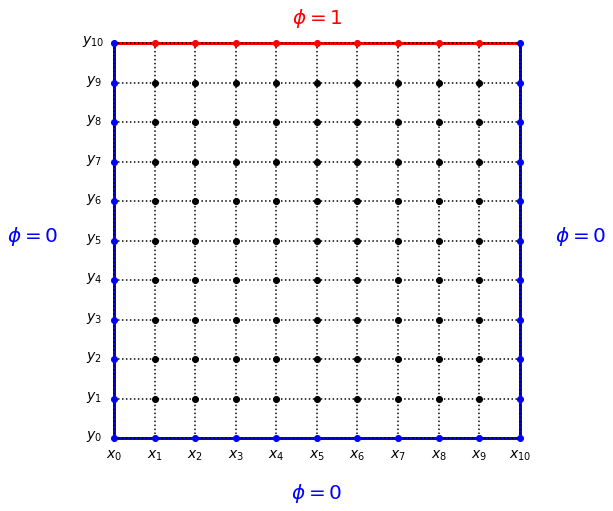

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constants
N   = 100   # number of divisions along one side of the square
V   = 1.0   # fixed potential at one end
tol = 1e-3  # target accuracy

# create an (N+1)x(N+1) array to hold values of potential
phi = np.zeros((),float)     # initial values
phip = np.zeros((),float)    # updated values

phi[0,:] = V  # saving the boundary value

delta = np.inf
while :
    for i in range():
        for j in range():
            if i==0 or i==N or j==0 or j==N:
                phip[i,j] = 
            else:
                phip[i,j] = 
    delta = np.max(abs(phip-phi))    # absolute difference between old and new values
    phi, phip = phip, phi            # update the old array with new values

plt.imshow(phi)

## Poisson's Equation

Consider that all sides of the above square box are now being kept at 0 V. Two "square" charges $\pm$1 C m$^{-2}$, are each 20 cm on a side and are placed 20 cm from the walls of the box. Solving the Poisson's equation gives us
$$ \phi(x_i,y_i) = \frac{1}{4} \left[\phi(x_i+a,y_i) + \phi(x_i-a,y_i) + \phi(x_i,y_i+a) + \phi(x_i,y_i-a)\right] + \frac{a^2}{4\epsilon_0} \rho(x_i,y_i) $$

In [ ]:
# constants
epsilon0 = 8.85e-12   # C^2/m^2/N
N   = 100   # number of divisions along one side of the square
tol = 1e3  # target accuracy

xs, xe = 0.0, 1.0
ys, ye = 0.0, 1.0
a   = (xe-xs)/N   # grid spacing

# create an (N+1)x(N+1) array to hold values of potential
phi = np.zeros((N+1,N+1),float)     # initial values
phip = np.zeros((N+1,N+1),float)    # updated values

def rho(x,y):
    if x>0.6 and x<0.8 and y>0.6 and y<0.8:
        return 1
    elif x>0.2 and x<0.4 and y>0.2 and y<0.4:
        return -1
    else:
        return 0

delta = np.inf
while delta>tol:
    for i in range(1,N):
        for j in range(1,N):
                phip[i,j] = 0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]) + a*a*rho(i*a,j*a)/4./epsilon0
    delta = np.max(abs(phip-phi))    # absolute difference between old and new values
    phi, phip = phip, phi            # update the old array with new values

plt.imshow(phi,origin='lower')

# Try it yourself

### Total 4 marks

Change the boundary condition of the Laplace equation problem above to $V(x_0,y)=V(x_{N+1},y)=-1$ and $V(x,y_0)=V(x,y_{N+1})=1$. Grab each frame as the Jacobi method iterates and create an animation of the code as it evolves to produce the final $\phi(x,y)$.